'encoder_self_attention.png' başarıyla oluşturuldu ve kaydedildi.


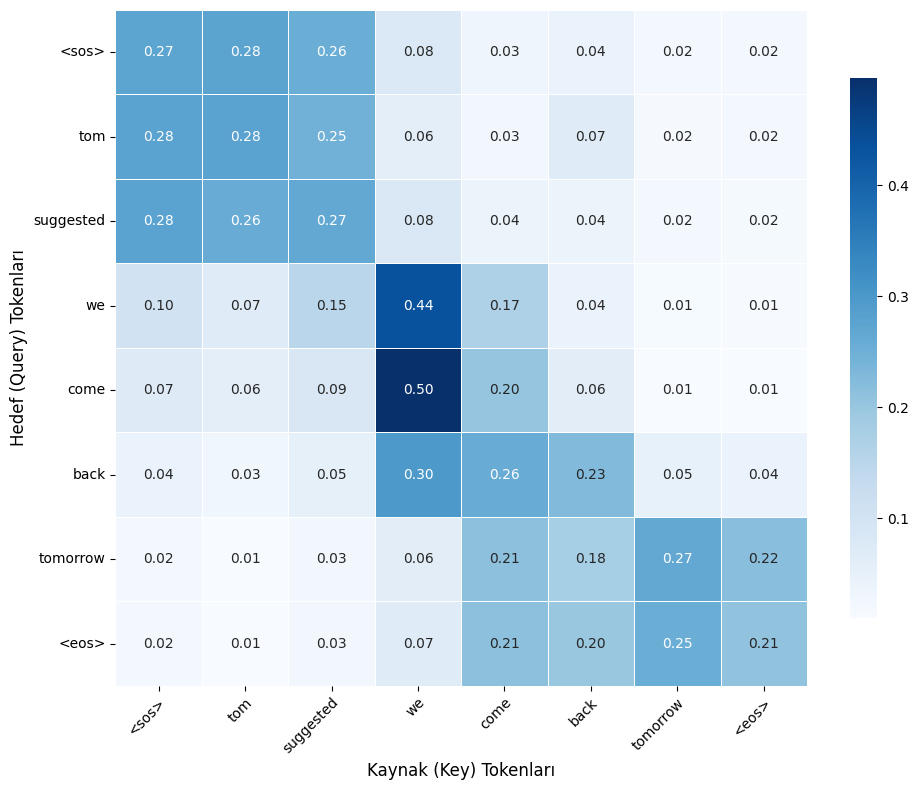

'decoder_cross_attention.png' başarıyla oluşturuldu ve kaydedildi.


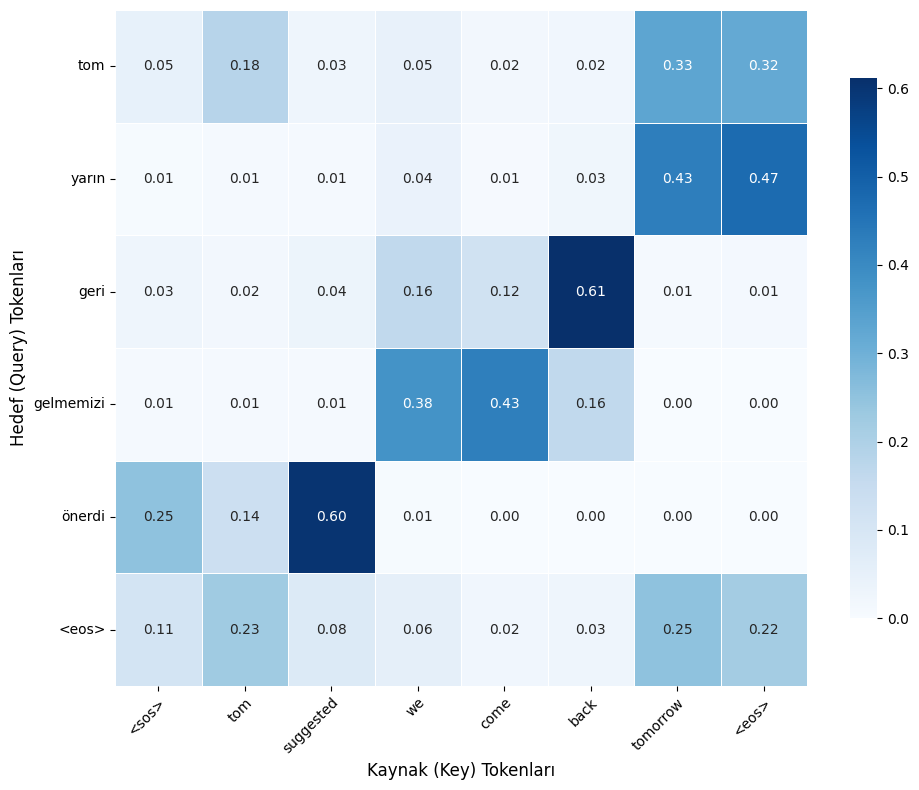

'decoder_masked_self_attention.png' başarıyla oluşturuldu ve kaydedildi.


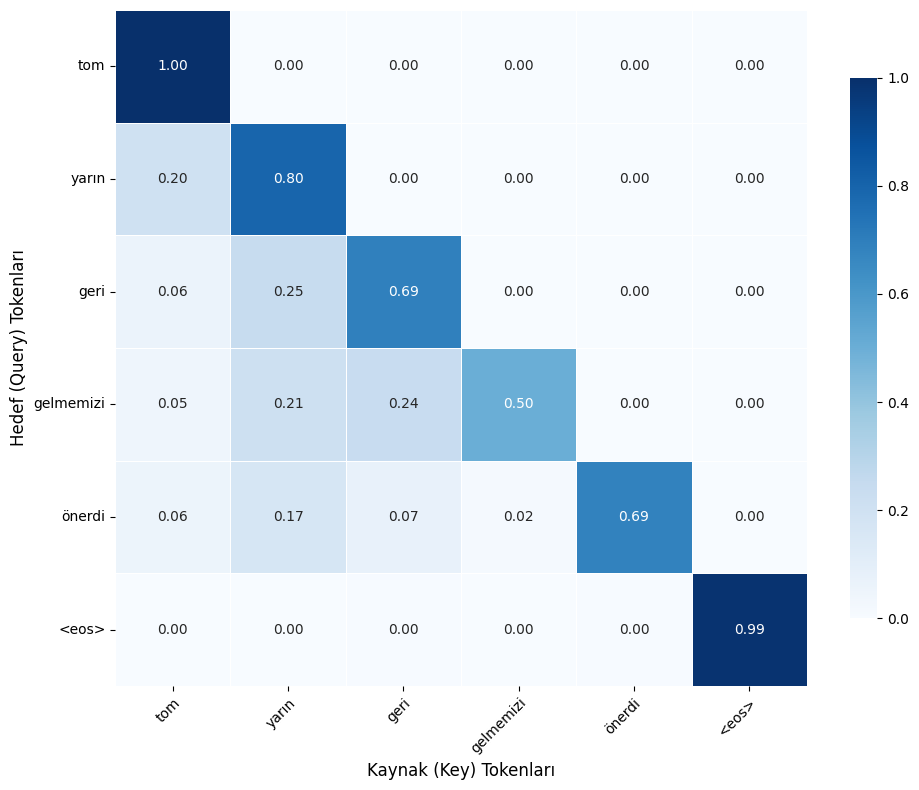

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

# --- MATRİS VERİLERİ ---
# Bir önceki adımdan elde ettiğimiz nihai sonuçlar

# 1. Encoder Kendi Kendine Dikkat Matrisi
encoder_self_attention_matrix = np.array([
    [0.274, 0.276, 0.255, 0.079, 0.033, 0.042, 0.02, 0.02],
    [0.279, 0.279, 0.247, 0.061, 0.026, 0.068, 0.017, 0.023],
    [0.279, 0.258, 0.265, 0.082, 0.039, 0.037, 0.02, 0.019],
    [0.105, 0.069, 0.151, 0.436, 0.169, 0.044, 0.014, 0.012],
    [0.072, 0.058, 0.086, 0.497, 0.203, 0.062, 0.011, 0.01],
    [0.041, 0.03, 0.053, 0.298, 0.258, 0.228, 0.049, 0.042],
    [0.021, 0.011, 0.025, 0.063, 0.215, 0.18, 0.265, 0.219],
    [0.02, 0.011, 0.026, 0.069, 0.214, 0.199, 0.254, 0.208]
])

# 2. Decoder Çapraz Dikkat Matrisi
decoder_cross_attention_matrix = np.array([
    [0.049, 0.184, 0.03, 0.047, 0.019, 0.022, 0.33, 0.319],
    [0.006, 0.011, 0.01, 0.041, 0.008, 0.026, 0.428, 0.471],
    [0.029, 0.018, 0.035, 0.164, 0.12, 0.612, 0.011, 0.012],
    [0.01, 0.01, 0.011, 0.378, 0.426, 0.164, 0.001, 0.001],
    [0.252, 0.135, 0.602, 0.006, 0.001, 0.0, 0.001, 0.002],
    [0.112, 0.227, 0.082, 0.056, 0.022, 0.031, 0.252, 0.218]
])

# 3. Decoder Maskelenmiş Kendi Kendine Dikkat Matrisi
decoder_masked_self_attention_matrix = np.array([
    [1.0,   0.0,   0.0,   0.0,   0.0,   0.0],
    [0.205, 0.795, 0.0,   0.0,   0.0,   0.0],
    [0.061, 0.246, 0.692, 0.0,   0.0,   0.0],
    [0.046, 0.211, 0.24,  0.503, 0.0,   0.0],
    [0.056, 0.165, 0.075, 0.018, 0.686, 0.0],
    [0.002, 0.002, 0.004, 0.001, 0.004, 0.987]
])

# Token listeleri
src_tokens = ['<sos>', 'tom', 'suggested', 'we', 'come', 'back', 'tomorrow', '<eos>']
# Üretilen çevirinin token listesi (<sos> olmadan, çünkü o bir şey üretmiyor)
trg_tokens = ['tom', 'yarın', 'geri', 'gelmemizi', 'önerdi', '<eos>']


# --- GENEL GÖRSELLEŞTİRME FONKSİYONU ---
def plot_attention_heatmap(matrix, xticklabels, yticklabels, title, filename):
    """
    Verilen bir dikkat matrisi için bir ısı haritası çizer ve kaydeder.
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    # Seaborn ile ısı haritası oluşturma
    # cmap="viridis" veya "plasma" gibi farklı renk haritaları da kullanılabilir.
    sns.heatmap(matrix, xticklabels=xticklabels, yticklabels=yticklabels,
                annot=True, fmt=".2f", cmap="Blues", ax=ax,
                linewidths=.5, cbar_kws={"shrink": .8})

    # Başlık ve eksen etiketleri
    # ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel("Kaynak (Key) Tokenları", fontsize=12)
    ax.set_ylabel("Hedef (Query) Tokenları", fontsize=12)

    # Eksen etiketlerinin okunabilirliğini artırma
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
    plt.yticks(rotation=0)

    # Grafiği daha düzenli göstermek için
    plt.tight_layout()

    # Grafiği yüksek çözünürlüklü olarak kaydetme
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    print(f"'{filename}' başarıyla oluşturuldu ve kaydedildi.")
    plt.show()


# --- MATRİSLERİ GÖRSELLEŞTİRME ---

# 1. Encoder Self-Attention Görseli
plot_attention_heatmap(
    matrix=encoder_self_attention_matrix,
    xticklabels=src_tokens,
    yticklabels=src_tokens,
    title="Encoder Self-Attention (Kaynak Cümlenin Kendi İçindeki Dikkati)",
    filename="encoder_self_attention.png"
)

# 2. Decoder Cross-Attention Görseli
plot_attention_heatmap(
    matrix=decoder_cross_attention_matrix,
    xticklabels=src_tokens,
    yticklabels=trg_tokens,
    title="Decoder Cross-Attention (Hedefin Kaynağa Dikkati)",
    filename="decoder_cross_attention.png"
)

# 3. Decoder Masked Self-Attention Görseli
plot_attention_heatmap(
    matrix=decoder_masked_self_attention_matrix,
    xticklabels=trg_tokens, # Bu matriste kaynak ve hedef aynı
    yticklabels=trg_tokens,
    title="Decoder Masked Self-Attention (Hedefin Kendi İçindeki Dikkati)",
    filename="decoder_masked_self_attention.png"
)
